# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [56]:
import pandas as pd

In [57]:
# If this cell does not work try running ``

import io
import nbformat

nb = nbformat.read("Lab1.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

FileNotFoundError: [Errno 2] No such file or directory: 'Lab1.ipynb'

## 1. Familiarization and discretization task – 1 A4 (5 Points)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [58]:
df = pd.read_csv("datasets/dataset_10/capture20110818.binetflow")
df.head()

# Print unique values of labels
print(df.Label.unique())



['flow=Background-TCP-Attempt' 'flow=Background-TCP-Established'
 'flow=Background-Established-cmpgw-CVUT' 'flow=To-Background-CVUT-Proxy'
 'flow=Background' 'flow=Background-UDP-Established'
 'flow=Background-UDP-Attempt' 'flow=From-Background-CVUT-Proxy'
 'flow=To-Background-UDP-CVUT-DNS-Server' 'flow=To-Background-Grill'
 'flow=Background-Attempt-cmpgw-CVUT'
 'flow=Background-UDP-NTP-Established-1' 'flow=Background-google-webmail'
 'flow=Background-google-analytics11' 'flow=From-Normal-V51-Grill'
 'flow=Background-google-analytics10' 'flow=From-Normal-V51-Stribrek'
 'flow=Background-google-analytics6' 'flow=To-Background-Stribrek'
 'flow=Background-google-analytics9' 'flow=To-Background-CVUT-WebServer'
 'flow=Background-google-analytics15' 'flow=Background-google-analytics2'
 'flow=From-Normal-V51-Jist' 'flow=Background-google-analytics8'
 'flow=To-Background-Jist' 'flow=Background-google-analytics3'
 'flow=Background-google-analytics14' 'flow=To-Background-MatLab-Server'
 'flow=To-

In [59]:
# Print the number of null values
print("Number of Nan values: ", df.isnull().sum())


# Print types of features
print("Types of features: ")
for col in df.columns:
    print(col, ": ", type(df[col][0]))

# Print the number of unique values for each feature
print("Number of unique values for each feature: ")
for col in df.columns:
    print(col, ": ", len(df[col].unique()))

Number of Nan values:  StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          6987
Dir               0
DstAddr           0
Dport        104215
State          1228
sTos          12852
dTos         186791
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Types of features: 
StartTime :  <class 'str'>
Dur :  <class 'numpy.float64'>
Proto :  <class 'str'>
SrcAddr :  <class 'str'>
Sport :  <class 'str'>
Dir :  <class 'str'>
DstAddr :  <class 'str'>
Dport :  <class 'str'>
State :  <class 'str'>
sTos :  <class 'numpy.float64'>
dTos :  <class 'numpy.float64'>
TotPkts :  <class 'numpy.int64'>
TotBytes :  <class 'numpy.int64'>
SrcBytes :  <class 'numpy.int64'>
Label :  <class 'str'>
Number of unique values for each feature: 
StartTime :  1309789
Dur :  515748
Proto :  14
SrcAddr :  151256
Sport :  114793
Dir :  6
DstAddr :  72957
Dport :  47046
State :  332
sTos :  6
dTos :  5
TotPkts :  3190
TotBytes :  61767
Src

In [85]:
# Replace the Nan values of the sport and dport features with 0
df['Sport'] = df['Sport'].fillna("-1")
df['Dport'] = df['Dport'].fillna("-1")

# Turn the hex values of the sport and dport features into int if it is a hex value
df['Sport'] = df['Sport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)
df['Dport'] = df['Dport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)


# Change the type of the dport and sport features to int
df['Sport'] = df['Sport'].astype(int)
df['Dport'] = df['Dport'].astype(int)

# Replace one NaN value of the State
df['State'] = df['State'].fillna("None")


In [61]:
# Print the range of values for each feature
print("Range of values for each feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        continue
    print(col, ": ", df[col].min(), " - ", df[col].max())


Range of values for each feature: 
Dur :  0.0  -  3600.019287
Sport :  -1  -  65535
Dport :  -1  -  539032744
sTos :  0.0  -  192.0
dTos :  0.0  -  3.0
TotPkts :  1  -  1853001
TotBytes :  60  -  1933022240
SrcBytes :  0  -  1233899763


In [62]:
# Group the df into malicious and benign flows
# The label of malicious flows contain the string 'Botnet'
malicious_flows = df[df.Label.str.contains('Botnet')]
benign_flows = df[~df.Label.str.contains('Botnet')]

# Print the number of malicious and benign flows
print("Number of malicious flows: ", len(malicious_flows))
print("Number of benign flows: ", len(benign_flows))


Number of malicious flows:  106352
Number of benign flows:  1203439


In [63]:
display(malicious_flows.head())
display(benign_flows.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
90622,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS
90808,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS
90809,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...
90965,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS
90968,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [64]:
# Find Nan values
print("Number of Nan values in malicious flows: ", malicious_flows.isnull().sum())
print("Number of Nan values in benign flows: ", benign_flows.isnull().sum())

Number of Nan values in malicious flows:  StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport             0
Dir               0
DstAddr           0
Dport             0
State          1227
sTos              0
dTos         106116
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Number of Nan values in benign flows:  StartTime        0
Dur              0
Proto            0
SrcAddr          0
Sport            0
Dir              0
DstAddr          0
Dport            0
State            1
sTos         12852
dTos         80675
TotPkts          0
TotBytes         0
SrcBytes         0
Label            0
dtype: int64


In [89]:
# Print out the float values of state
print("Float values of state in malicious flows: ", malicious_flows[malicious_flows['State'].apply(lambda x: type(x) == float)])

Float values of state in malicious flows:                            StartTime  Dur Proto        SrcAddr  Sport    Dir  \
478704   2011/08/18 12:35:01.006027  0.0  icmp  147.32.84.204  33287     ->   
478929   2011/08/18 12:33:24.308449  0.0  icmp  147.32.84.209  55041     ->   
479233   2011/08/18 12:35:08.873504  0.0  icmp  147.32.84.204  23553     ->   
479263   2011/08/18 12:34:54.903462  0.0  icmp  147.32.84.193   2306     ->   
479336   2011/08/18 12:32:58.960725  0.0  icmp  147.32.84.209  59649     ->   
...                             ...  ...   ...            ...    ...    ...   
1227792  2011/08/18 15:01:28.550288  0.0  icmp  147.32.84.209  56322     ->   
1227837  2011/08/18 15:04:55.645810  0.0  icmp  147.32.84.208  19975     ->   
1227885  2011/08/18 15:01:24.451486  0.0  icmp  147.32.84.209  52737     ->   
1229406  2011/08/18 15:03:54.340559  0.0  icmp  147.32.84.205  54786     ->   
1230911  2011/08/18 14:50:25.427891  0.0  icmp  147.32.84.209  26119     ->   

        

In [94]:
# Convert floats to None in state
malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)

C:\Users\micha\AppData\Local\Temp\ipykernel_22872\1871391738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)


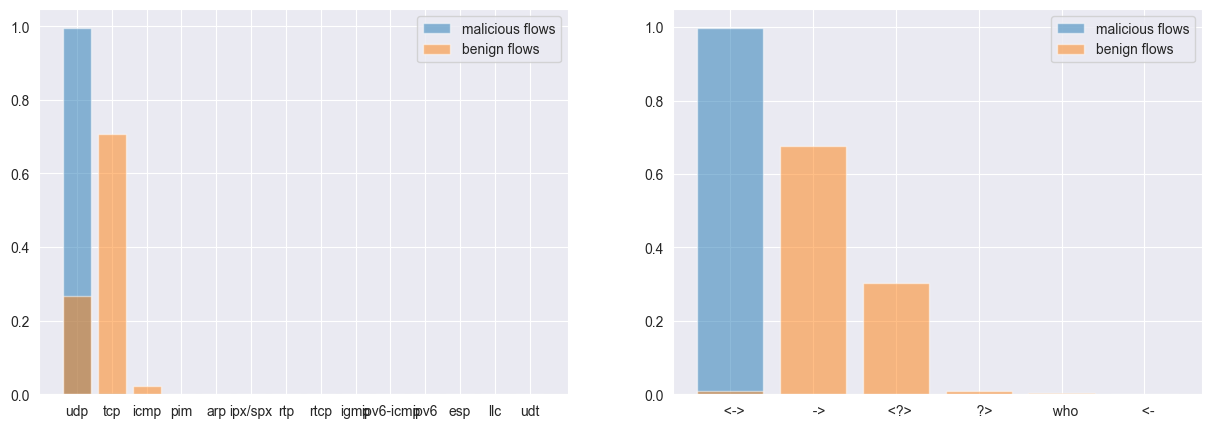

In [97]:
import numpy as np
# Visualize the distribution of the features
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features
feature1 = 'Proto'
feature2 = 'Dir'

# Plot the distribution of the features normalized
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ax[0].hist(malicious_flows[feature1], bins=50, alpha=0.5, label='malicious flows', density=True)
# ax[0].hist(benign_flows[feature1], bins=50, alpha=0.5, label='benign flows', density=True)
ax[0].bar(malicious_flows[feature1].unique(), malicious_flows[feature1].value_counts(normalize=True), alpha=0.5, label='malicious flows')
ax[0].bar(benign_flows[feature1].unique(), benign_flows[feature1].value_counts(normalize=True), alpha=0.5, label='benign flows')
ax[1].bar(malicious_flows[feature2].unique(), malicious_flows[feature2].value_counts(normalize=True), alpha=0.5, label='malicious flows')
ax[1].bar(benign_flows[feature2].unique(), benign_flows[feature2].value_counts(normalize=True), alpha=0.5, label='benign flows')
ax[0].legend()
ax[1].legend()



### 1b. Discretize selected features

### 1c. Answers and explanation

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.